# Prelude part 1: Regular expressions

In [1]:
import re
str = 'purple alice-b@google.com monkey dishwasher'
match= re.search(r'([\w.-]+)@([\w.-]+)',str)

In [2]:
match[0],match[1],match[1]

('alice-b@google.com', 'alice-b', 'alice-b')

In [3]:
strs = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
re.findall(r'([\w.-]+)@([\w.-]+)',strs)

[('alice', 'google.com'), ('bob', 'abc.com')]

In [4]:
re.findall(r'[\w.-]+@[\w.-]+',strs)

['alice@google.com', 'bob@abc.com']

In [5]:
f= open('test-mail','r')

FileNotFoundError: [Errno 2] No such file or directory: 'test-mail'

In [ ]:
re.findall(r'[\w.-]+@[\w.-]+',f.read())

## 1. Regular expressions round 1

what are regular expressions?

In [ ]:
f1=open('test-text','r')
re.findall(r'\d{4}',f1.read())

In [ ]:
f1=open('test-text','r')
matches = re.finditer(r'\bsuper[a-zA-Z]*',f1.read())

for matchNum, match in enumerate(matches, start=1):
    
    print ("Match {matchNum} was found at {start}-{end}: {match}".format(matchNum = matchNum, start = match.start(), end = match.end(), match = match.group()))
    
    for groupNum in range(0, len(match.groups())):
        groupNum = groupNum + 1
        
        print ("Group {groupNum} found at {start}-{end}: {group}".format(groupNum = groupNum, start = match.start(groupNum), end = match.end(groupNum), group = match.group(groupNum)))


In [ ]:
f1=open('test-text','r')
re.findall(r'\bsuper[a-zA-Z]*',f1.read())

## 2. Regular expressions round 2

In [ ]:
f2=open('Zelda-test-text','r')
re.findall(r'{{.*?}}',f2.read())

# Prelude part 2: Pandas DataFrames

## Part A: Download the Zelda Wikipages of characters

In [6]:
import urllib.request
import json

ally_title='Characters_in_Breath_of_the_Wild'
enemy_title='Enemies_in_Breath_of_the_Wild'
boss_title='Bosses_in_Breath_of_the_Wild'


def get_jsonfile(titlename):
    baseurl='https://zelda.fandom.com/api.php?'
    action="action=query"
    title='titles='+titlename
    content='prop=revisions&rvprop=content'
    rvslots='rvslots=*'
    dformat='format=json'

    url='{}{}&{}&{}&{}&{}'.format(baseurl,action,content,title,rvslots,dformat)

    response=urllib.request.urlopen(url)
    html=response.read()
    content=json.loads(html)
    
    filename=title+'.json'
    with open(filename,"w") as f:
        json.dump(content, f)
        
    return filename

In [7]:
allyjson=get_jsonfile(ally_title)
enemyjson=get_jsonfile(enemy_title)
bossjson=get_jsonfile(boss_title)

In [8]:
f=open(allyjson,'r')
allylist=re.findall(r'{{Term\|[^{}]*?\|([^{}]*?)\|link}}',f.read())
allylist

['Baddek',
 'Bamboo',
 'Banji',
 'Baumar',
 'Bayge',
 'Beedle',
 'Bolson',
 'Brigo',
 'Cambo',
 'Chabi',
 'Chork',
 'Chumin',
 'Dabi',
 'Daruk',
 'Dauntless',
 'Dinraal',
 'Ena',
 'Endai',
 'Epona',
 'Farosh',
 'Fyson',
 'Goflam',
 'Greyson',
 'Heehl',
 'Hestu',
 'Hudson',
 'Hylia',
 'Kabetta',
 'Kanny',
 'Kapson',
 'Karson',
 'Kass',
 'Kenyo',
 'Kilton',
 'Leekah',
 'Link',
 'Meeshy',
 'Meghyn',
 'Mei',
 'Mils',
 'Mina',
 'Mipha',
 'Misko',
 'Nat',
 'Naydra',
 'Nazbi',
 'Pelison',
 'Pikango',
 'Regan',
 'Revali',
 'Rhondson',
 'Rik',
 'Ronn',
 'Savelle',
 'Sherfin',
 'Sho',
 'Sorelia',
 'Spoone',
 'Toren',
 'Totsuna',
 'Tye',
 'Urbosa',
 'Yammo',
 'Princess Zelda',
 'Zyle',
 'Laroba',
 'Naddon',
 'Pitar',
 'Dah Hesho',
 'Dmitri',
 'Gleema',
 'Jana',
 'Kah Mael',
 'Kaifa',
 "Ke'nai Shakah",
 'Lonni',
 'Nell',
 'Rex',
 'Stamm',
 'Tenne',
 'Tutsuwa Nima',
 'Ze Kasho',
 'Grant\\u00e9',
 'Hagie',
 'Hunnie',
 'Moggs',
 'Monari',
 'Ruli',
 'Ritaag Zumo',
 "Tu Ka'loh",
 'Aya',
 'Cherry',
 'Ho

In [9]:
file=open(enemyjson,'r').read()
index=re.search('Traps',file).start()

enemylist=re.findall(r'{{Term?\|[^{}]*?\|([^{}]*?)\|link}}',file[:index])
enemylist

['Black Bokoblin',
 'Black Lizalfos',
 'Black Moblin',
 'Blizzrobe',
 'Blue Bokoblin',
 'Blue Lizalfos',
 'Blue-Maned Lynel',
 'Blue Moblin',
 'Bokoblin',
 'Chuchu',
 'Chuchu',
 'Chuchu',
 'Cursed Bokoblin',
 'Cursed Lizalfos',
 'Cursed Moblin',
 'Decayed Guardian',
 'Electric Chuchu',
 'Electric Chuchu',
 'Electric Chuchu',
 'Electric Keese',
 'Electric Lizalfos',
 'Electric Wizzrobe',
 'Fire-Breath Lizalfos',
 'Fire Chuchu',
 'Fire Chuchu',
 'Fire Chuchu',
 'Fire Keese',
 'Fire Wizzrobe',
 'Forest Octorok',
 'Frost Pebblit',
 'Golden Bokoblin',
 'Golden Lizalfos',
 'Golden Lynel',
 'Golden Moblin',
 'Guardian Stalker',
 'Guardian Scout I',
 'Guardian Scout II',
 'Guardian Scout III',
 'Guardian Scout IV',
 'Guardian Skywatcher',
 'Guardian Turret',
 'Ice Chuchu',
 'Ice Chuchu',
 'Ice Chuchu',
 'Ice Keese',
 'Ice-Breath Lizalfos',
 'Ice Wizzrobe',
 'Igneo Pebblit',
 'Keese',
 'Lizalfos',
 'Lynel',
 'Meteo Wizzrobe',
 'Moblin',
 'Rock Octorok',
 'Sentry',
 'Silver Bokoblin',
 'Silver L

In [10]:
f=open(bossjson,'r')
bosslist=re.findall(r'[^(]{{Term?\|[^{}]*?\|([^{}]*?)\|link}}',f.read())
bosslist

['Stone Talus',
 'Stone Talus (Junior)',
 'Stone Talus (Senior)',
 'Stone Talus (Luminous)',
 'Stone Talus (Rare)',
 'Igneo Talus',
 'Frost Talus',
 'Hinox',
 'Hinox',
 'Hinox',
 'Hinox',
 'Blue Hinox',
 'Black Hinox',
 'Stalnox',
 'Molduga',
 'Igneo Talus Titan',
 'Molduking',
 'Windblight Ganon',
 'Fireblight Ganon',
 'Thunderblight Ganon',
 'Waterblight Ganon',
 'Master Kohga',
 'Monk Maz Koshia',
 'Calamity Ganon',
 'Dark Beast Ganon']

In [11]:
# drop the duplicates, then save the data in a csv file

In [12]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame({ 'Name':allylist,'Role':'Ally'
                  })
df2 = pd.DataFrame({ 'Name':enemylist,'Role':'Enemy'
                  })
df3 = pd.DataFrame({ 'Name':bosslist,'Role':'Boss'
                  })
df=df1.append(df2).append(df3)
df.drop_duplicates(inplace=True)

In [13]:
df

,Name,Role
0,Baddek,Ally
1,Bamboo,Ally
2,Banji,Ally
3,Baumar,Ally
4,Bayge,Ally
...,...,...
20,Waterblight Ganon,Boss
21,Master Kohga,Boss
22,Monk Maz Koshia,Boss
23,Calamity Ganon,Boss


In [14]:
df.to_csv (r'export_dataframe.csv', index = False, header=True)

In [15]:
def get_jsonfile2(rolename):
    titlename =urllib.parse.quote_plus(rolename.replace(' ', '_'))
    
    baseurl='https://zelda.fandom.com/api.php?'
    action="action=query"
    title='titles='+titlename
    content='prop=revisions&rvprop=content'
    rvslots='rvslots=*'
    dformat='format=json'

    url='{}{}&{}&{}&{}&{}'.format(baseurl,action,content,title,rvslots,dformat)

    response=urllib.request.urlopen(url)
    html=response.read()
    content=json.loads(html)
    
    filename='./characterfile/'+rolename+'.json'
    with open(filename,"w") as f:
        json.dump(content, f)

In [16]:
namelist=pd.read_csv('export_dataframe.csv')['Name']

In [17]:
for name in namelist:
    get_jsonfile2(name)

In [18]:
# Question
# Manny (Breath of the Wild)
# Stone Talus (Senior)

# Grant\u00e9 urllib.parse.quote_plus('name')
# Korsh O'hu
# https://zelda.fandom.com/api.php?action=query&prop=revisions&rvprop=content&titles=Stone_Talus_(Senior&rvslots=*&format=json)

# Check the character page for "Cherry" Add a check to find any redirect in a page description. (hint: the description will be in the form #REDIRECT [[PAGENAME]] so you should use PAGENAME in your query instead)

In [19]:
# titlename = urllib.parse.quote_plus('Grant\u00e9'.replace(' ', '_'))

## Part B: Building the network

Race Gender
race= {{Term|BotW|Hylian|link}}\n|gender= Male
race= [[Hylian]]\n|gender= Male

all the hyperlinks in a character's page that link to another node of the network (e.g. another character)

1. direct links, i.e. [[name of character]] or {{Term|BotW|name of character|link}}
2. links using text, i.e. [[Princess Zelda|Zelda]] or {{Term|Series|Princess Zelda|link|display=Zelda}}
3. links to pages that have parentheses, i.e. [[Ocarina of Time (Item)|]] or {{Term|Series|Ocarina of Time (Item)|link}}
4. links using plural terms, i.e. [[Heart]]s or {{Plural|Series|Heart|link}}
5. links to sections of another page, i.e. [[Link#Breath of the Wild]] or {{Term|BotW|Link|link}}

For each link you extract, check if the target is a character. If yes, keep it. If no, discard it.

In [20]:
df['Race']='Unknown'
df['Gender']='Unknown'
df['LinkToNode']=''
# type(df['Name'])

In [21]:
df.dtypes

Name          object
Role          object
Race          object
Gender        object
LinkToNode    object
dtype: object

In [22]:
# df['LinkToNode'] = df['LinkToNode'].astype('object')

In [23]:
df

,Name,Role,Race,Gender,LinkToNode
0,Baddek,Ally,Unknown,Unknown,
1,Bamboo,Ally,Unknown,Unknown,
2,Banji,Ally,Unknown,Unknown,
3,Baumar,Ally,Unknown,Unknown,
4,Bayge,Ally,Unknown,Unknown,
...,...,...,...,...,...
20,Waterblight Ganon,Boss,Unknown,Unknown,
21,Master Kohga,Boss,Unknown,Unknown,
22,Monk Maz Koshia,Boss,Unknown,Unknown,
23,Calamity Ganon,Boss,Unknown,Unknown,


In [24]:
for index, character in df.iterrows():
    filename = './characterfile/'+character['Name']+'.json'
#     print(filename)
    filecontent=open(filename,'r').read()

    racematch=re.findall(r"race= (\[\[(\w+)\]\]|{{Term\|BotW\|([^{}]*?)\|link}})",filecontent)
    gendermatch=re.findall(r"gender= (\w+)",filecontent) 
    
    if len(gendermatch)==0 and len(racematch) ==0:
        continue
    
    if len(racematch)!=0:
#         print(racematch[0][2])
        df.at[index,'Race']=racematch[0][2] if racematch[0][1]=='' else racematch[0][1]
    if len(gendermatch) !=0:  
        df.at[index,'Gender']=gendermatch[0] 
    
#     print(character['Race'],character['Gender'])
    
    matches=re.findall(r'(\[\[([^\[\]]*?)\]\]|\[\[([^\[\]]*?)\|Zelda\]\]|{{Term\|BotW\|([^{}]*?)\|link}}|{{Term\|Series\|([^{}]*?)\|link\|display=Zelda}})',filecontent)

    linklist=[]
    for match in matches:
        for link in match:
    #         namelist is Series, so we use namelist.values
            if link in namelist.values:
                linklist.append(link)
#     linklist=list(dict.fromkeys(linklist))
#     print([linklist])
   
    df.at[index,'LinkToNode']=[linklist]
df

,Name,Role,Race,Gender,LinkToNode
0,Baddek,Ally,Hylian,Male,"[Link, Link, Nazbi, Savelle, Yammo]"
1,Bamboo,Ally,Stone Talus,Unknown,[Stone Talus]
2,Banji,Ally,Stone Talus,Female,[Stone Talus]
3,Baumar,Ally,Stone Talus,Male,"[Stone Talus, Kilton, Calamity Ganon, Stone Ta..."
4,Bayge,Ally,Stone Talus,Male,"[Stone Talus, Calamity Ganon, Link, Kilton]"
...,...,...,...,...,...
20,Waterblight Ganon,Boss,Lizalfos,Male,"[Lizalfos, Lizalfos, Link, Link]"
21,Master Kohga,Boss,Sheikah,Male,[Link]
22,Monk Maz Koshia,Boss,Sheikah,Male,"[Link, Yiga Footsoldier, Thunderblight Ganon]"
23,Calamity Ganon,Boss,Chuchu,Male,"[Dark Beast Ganon, Fireblight Ganon, Thunderbl..."


In [25]:
# /(\[\[(.*?)\R]\]|\[\[([^\[\]]*?)\|Zelda\]\]|{{Term\|BotW\|([^{}]*?)\|link}}|{{Term\|Series\|([^{}]*?)\|link\|display=Zelda}})/gm

In [26]:
df.to_csv (r'export_dataframe_final.csv', index = False, header=True)

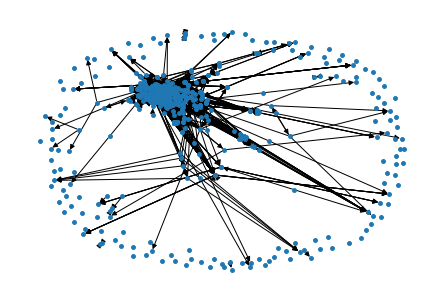

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

DG=nx.DiGraph()

for index, character in df.iterrows():
    DG.add_node(character['Name'], role=character['Role'], gender=character['Gender'], race=character['Race'])
   
    if isinstance(character['LinkToNode'], list):
        for name in character['LinkToNode']:
            if isinstance(name, list):
                for na in name:
                    DG.add_edge(character['Name'], na)
#                     print(character['Name'], na)
            else:
                DG.add_edge(character['Name'], name)
#                 print(character['Name'], name)
 
nx.draw(DG,node_size=15)

plt.show()

In [62]:
DG.edges()

OutEdgeView([('Baddek', 'Link'), ('Baddek', 'Nazbi'), ('Baddek', 'Savelle'), ('Baddek', 'Yammo'), ('Link', 'Calamity Ganon'), ('Nazbi', 'Lizalfos'), ('Nazbi', 'Cursed Lizalfos'), ('Nazbi', 'Fire-Breath Lizalfos'), ('Nazbi', 'Electric Lizalfos'), ('Nazbi', 'Blue Lizalfos'), ('Nazbi', 'Black Lizalfos'), ('Nazbi', 'Silver Lizalfos'), ('Nazbi', 'Golden Lizalfos'), ('Nazbi', 'Stalizalfos'), ('Yammo', 'Bokoblin'), ('Yammo', 'Cursed Bokoblin'), ('Yammo', 'Stalmoblin'), ('Yammo', 'Stalizalfos'), ('Yammo', 'Blue Bokoblin'), ('Yammo', 'Black Bokoblin'), ('Yammo', 'Silver Bokoblin'), ('Yammo', 'Golden Bokoblin'), ('Bamboo', 'Stone Talus'), ('Stone Talus', 'Link'), ('Stone Talus', 'Nazbi'), ('Stone Talus', 'Savelle'), ('Stone Talus', 'Yammo'), ('Banji', 'Stone Talus'), ('Baumar', 'Stone Talus'), ('Baumar', 'Kilton'), ('Baumar', 'Calamity Ganon'), ('Baumar', 'Stone Talus (Rare)'), ('Kilton', 'Moblin'), ('Kilton', 'Link'), ('Kilton', 'Old Man'), ('Kilton', 'Silver Moblin'), ('Kilton', 'Bokoblin'), (

In [28]:
DG.degree()
removelist = [node for node,degree in dict(DG.degree()).items() if degree == 0]
DG.remove_nodes_from(removelist)

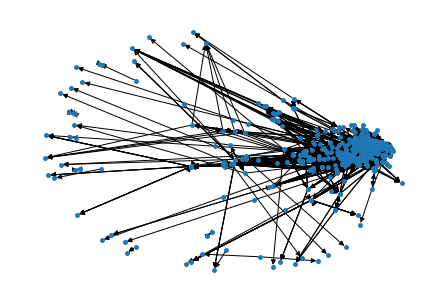

In [29]:
nx.draw(DG,node_size=15)

plt.show()

In [30]:
DG.number_of_nodes()

541

In [31]:
DG.number_of_edges()

1557

In [32]:
role_list = list(nx.get_node_attributes(DG, 'role').values())
race_list = list(nx.get_node_attributes(DG, 'race').values())
gender_list = list(nx.get_node_attributes(DG, 'gender').values())

(array([196.,  21.,   9., 119.,  41.,  78.,  14.,  12.,  27.,  24.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

<Figure size 432x288 with 0 Axes>

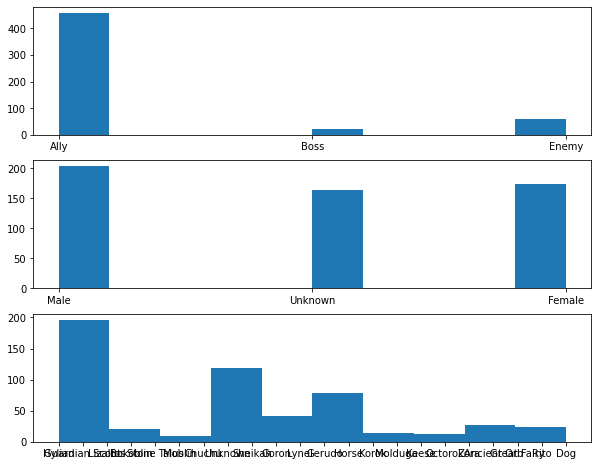

In [33]:
plt.subplots_adjust(hspace=1)
plt.figure(figsize=(10, 8)) 
plt.subplot(311)
plt.hist(role_list)
plt.subplot(312)
plt.hist(gender_list)
plt.subplot(313)
plt.hist(race_list)


In [34]:
dict(sorted(dict(DG.in_degree()).items(), key=lambda item: item[1], reverse=True)[:5])

{'Link': 382, 'Calamity Ganon': 92, 'Hylia': 67, 'Bokoblin': 18, 'Riju': 18}

In [35]:
dict(sorted(dict(DG.out_degree()).items(), key=lambda item: item[1], reverse=True)[:5])

{'Traysi': 13,
 'Stalizalfos': 12,
 'Urbosa': 12,
 'Silver Lizalfos': 11,
 'Sorelia': 11}

In [36]:
# dict(sorted(x.items(), key=lambda item: item[1]))
dict(sorted(dict(DG.degree()).items(), key=lambda item: item[1], reverse=True)[:5])

{'Link': 383,
 'Calamity Ganon': 97,
 'Hylia': 71,
 'Stalizalfos': 23,
 'Princess Zelda': 23}

In [37]:
# extract subgraph 
# upper case bug : role not Role
AllyDG=DG.subgraph([node for node,attr in DG.nodes(data=True) if attr['role']=="Ally"])
print('top 5 most connected allies (in-degree):',dict(sorted(dict(AllyDG.in_degree()).items(), key=lambda item: item[1], reverse=True)[:5]))
print('top 5 most connected allies (out-degree):',dict(sorted(dict(AllyDG.out_degree()).items(), key=lambda item: item[1], reverse=True)[:5]))

top 5 most connected allies (in-degree): {'Link': 338, 'Hylia': 65, 'Riju': 18, 'Mipha': 16, 'Princess Zelda': 13}
top 5 most connected allies (out-degree): {'Traysi': 11, 'Genli': 9, 'Cree': 8, 'Gaddison': 8, 'Dorian': 8}


In [38]:
EBDG=DG.subgraph([node for node,attr in DG.nodes(data=True) if attr['role']=="Enemy" or "Boss"])
print('top 5 most connected enemies -- bosses (in-degree):',dict(sorted(dict(EBDG.in_degree()).items(), key=lambda item: item[1], reverse=True)[:5]))
print('top 5 most connected enemies -- bosses (out-degree):',dict(sorted(dict(EBDG.out_degree()).items(), key=lambda item: item[1], reverse=True)[:5]))

top 5 most connected enemies -- bosses (in-degree): {'Link': 382, 'Calamity Ganon': 92, 'Hylia': 67, 'Bokoblin': 18, 'Riju': 18}
top 5 most connected enemies -- bosses (out-degree): {'Traysi': 13, 'Stalizalfos': 12, 'Urbosa': 12, 'Silver Lizalfos': 11, 'Sorelia': 11}


Text(0, 0.5, 'Frequency')

<Figure size 432x288 with 0 Axes>

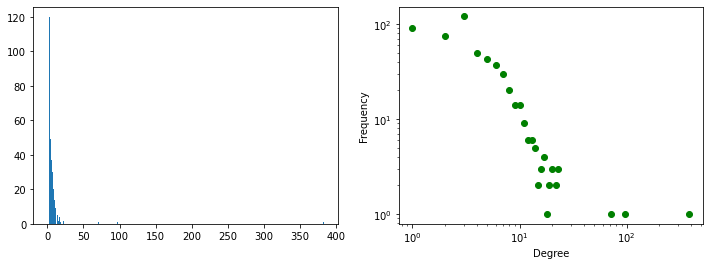

In [39]:
total_degree=nx.degree_histogram(DG)
# total_degree_freq=[de/float(sum(total_degree)) for de in total_degree]

plt.subplots_adjust(wspace=1)
plt.figure(figsize=(12, 4)) 
plt.subplot(121)
plt.bar(range(len(total_degree)), total_degree)
plt.subplot(122)
plt.loglog(range(len(total_degree)), total_degree, 'go',label='total-degree')

plt.xlabel('Degree')
plt.ylabel('Frequency')

In [40]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Text(0, 0.5, 'Frequency')

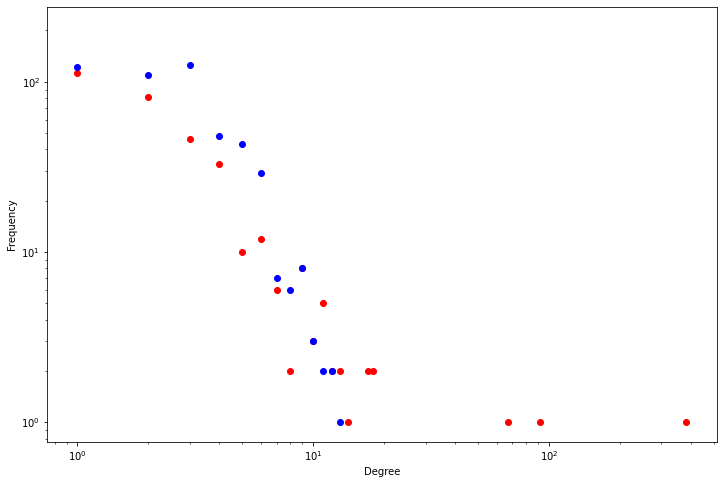

In [41]:

in_degree_freq = degree_histogram_directed(DG, in_degree=True)
out_degree_freq = degree_histogram_directed(DG, out_degree=True)

plt.figure(figsize=(12, 8)) 

plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'ro', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

* why the in-degree distribution is different from the out-degree distribution?

* Compare the degree distribution to a random network with the same number of nodes and p

* Compare the degree distribution to a scale-free network with the same number of nodes.

In [42]:
ave_k=sum(dict(DG.degree()).values())/len(DG.degree())
n_num=DG.number_of_nodes()
p=ave_k/(n_num-1)
# pk=[(ave_k**i)*(math.exp(-ave_k))/math.factorial(i) for i in k]
p

0.010659272951324707

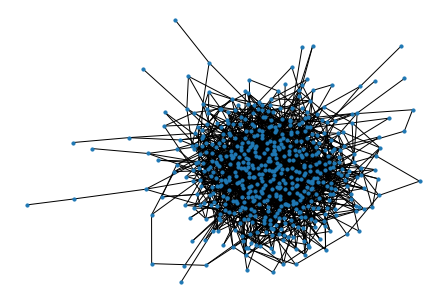

In [43]:
ERG=nx.random_graphs.erdos_renyi_graph(n_num,p)
nx.draw(ERG,node_size=10)

Text(0, 0.5, 'Frequency')

<Figure size 432x288 with 0 Axes>

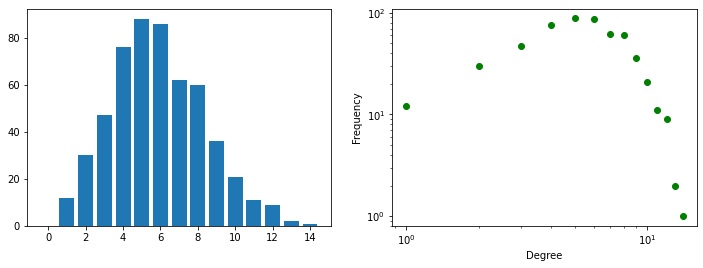

In [44]:
total_degree=nx.degree_histogram(ERG)
# total_degree_freq=[de/float(sum(total_degree)) for de in total_degree]

plt.subplots_adjust(wspace=1)
plt.figure(figsize=(12, 4)) 
plt.subplot(121)
plt.bar(range(len(total_degree)), total_degree)
plt.subplot(122)
plt.loglog(range(len(total_degree)), total_degree, 'go',label='total-degree')

plt.xlabel('Degree')
plt.ylabel('Frequency')

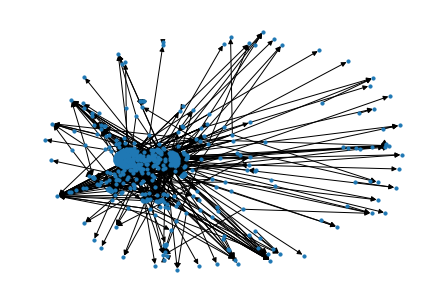

In [45]:
SFG=nx.scale_free_graph(n_num)
nx.draw(SFG,node_size=10)

Text(0, 0.5, 'Frequency')

<Figure size 432x288 with 0 Axes>

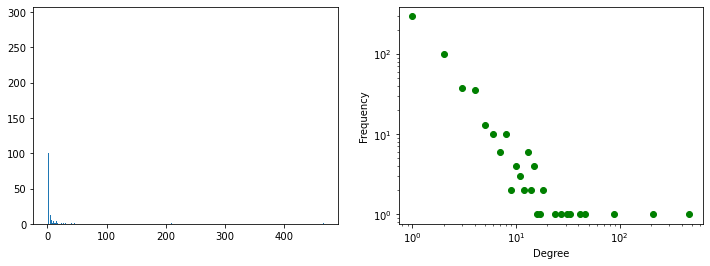

In [46]:
total_degree=nx.degree_histogram(SFG)
# total_degree_freq=[de/float(sum(total_degree)) for de in total_degree]

plt.subplots_adjust(wspace=1)
plt.figure(figsize=(12, 4)) 
plt.subplot(121)
plt.bar(range(len(total_degree)), total_degree)
plt.subplot(122)
plt.loglog(range(len(total_degree)), total_degree, 'go',label='total-degree')

plt.xlabel('Degree')
plt.ylabel('Frequency')

# Part A: Let's visualise!
## Exercise 1: Build the right graph for visualization:
* use weakly connected component to extract the largest component.
* store the length of the content as one of the attributes of the node (i.e. count the number of words you have in each character's page). 

In [47]:
largest_c_nodes = max(nx.weakly_connected_components(DG), key=len)

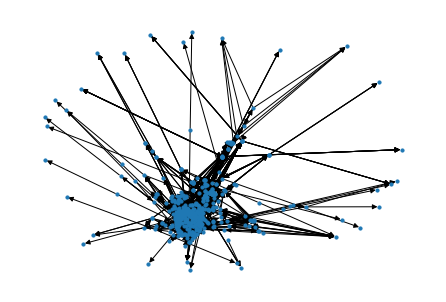

In [48]:
D_LCG = DG.subgraph(largest_c_nodes)
nx.draw(D_LCG,node_size=10)

## Exercise 2: Let's build a simple visualization of the network
*  convert our network to undirected graph. 
* Use the NetworkX command nx.draw_kamada_kawai to draw the resulting undirected network.

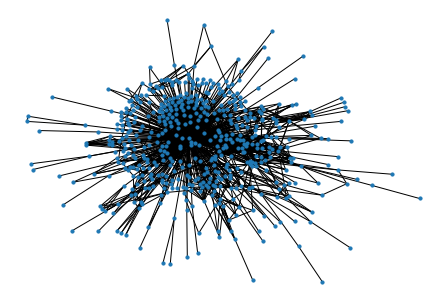

In [49]:
UND_LCG=D_LCG.to_undirected()
nx.draw(UND_LCG,node_size=10)

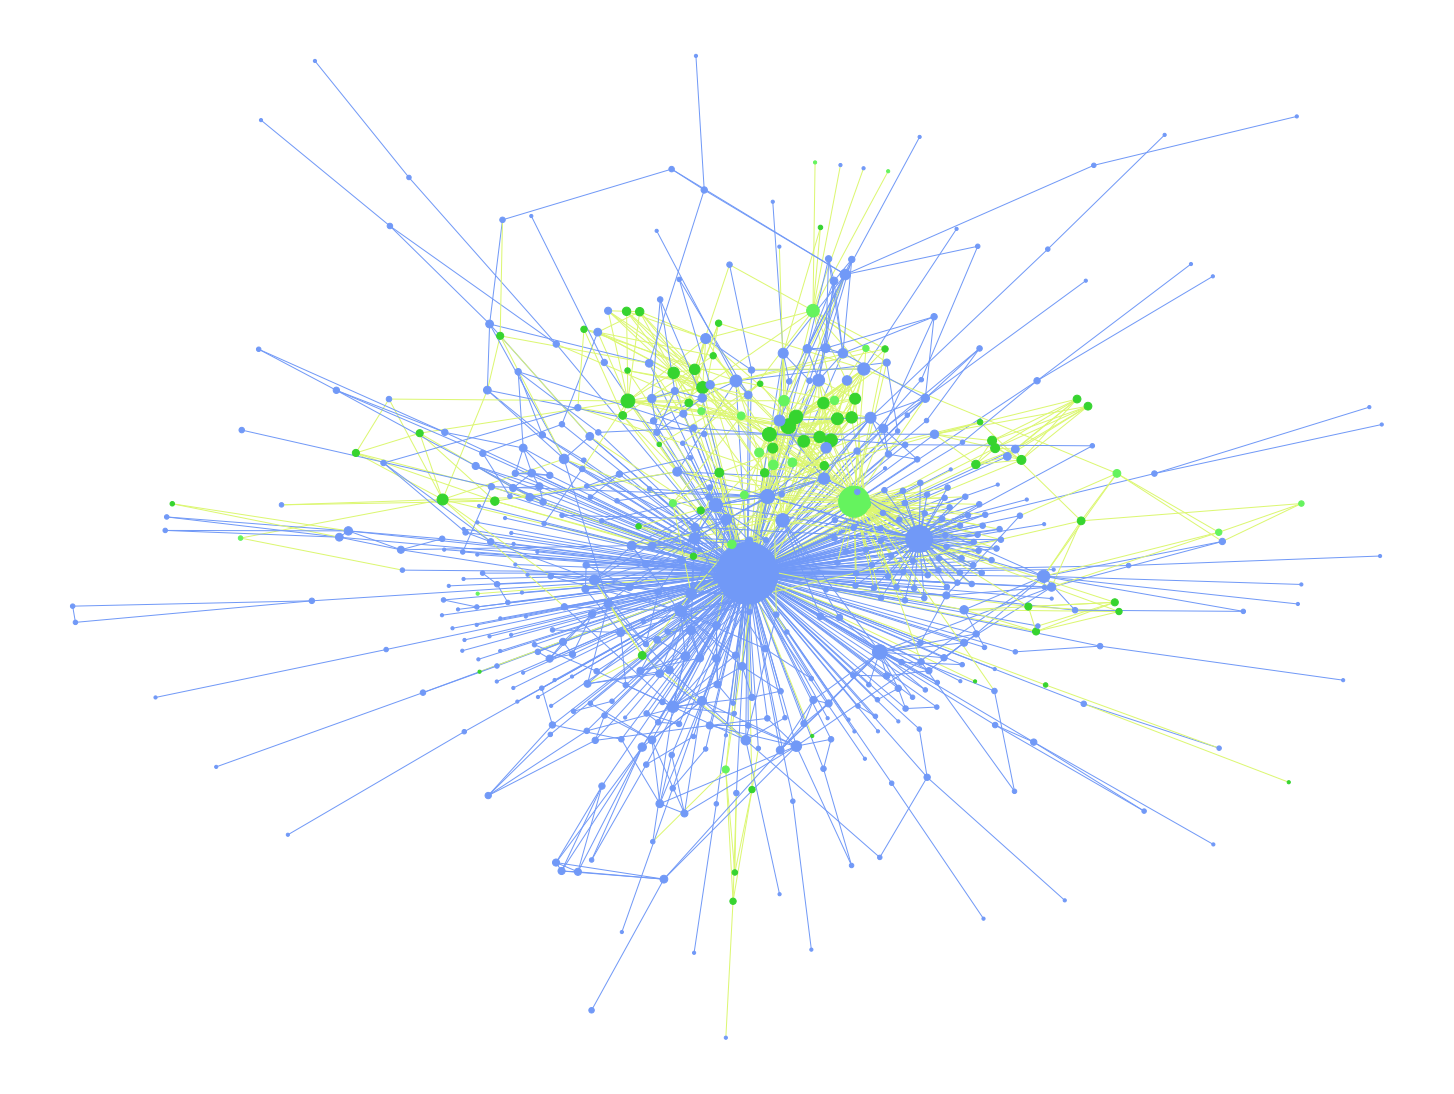

In [50]:
node_color_map = []
for node,attr in UND_LCG.nodes(data=True):
    if attr['role'] == "Ally":
        node_color_map.append('#7199F7')
    elif attr['role'] == "Enemy": 
        node_color_map.append('#36D42F')
    elif attr['role'] == "Boss":
        node_color_map.append('#65F35E')
    else:
        node_color_map.append('#B9BABE')
        
edge_color_map = []
for edge in UND_LCG.edges(data=True):
    u_role=UND_LCG.nodes[edge[0]]['role']
    v_role=UND_LCG.nodes[edge[1]]['role']
    if u_role == "Ally" and v_role == "Ally":
        edge_color_map.append('#7199F7')
    elif u_role == "Enemy" or "Boss" and v_role == "Enemy" or "Boss":
        edge_color_map.append('#DCF771')
    else:
        edge_color_map.append('#B9BABE')

d_list = dict(nx.degree(UND_LCG))
node_size_list=[v * 10 for v in d_list.values()]
plt.figure(figsize=(20, 15)) 
nx.draw(UND_LCG, node_color=node_color_map, edge_color=edge_color_map, node_size=node_size_list)

## Exercise 3: Make even better visualisations with ForceAtlas2 package

100%|██████████| 2000/2000 [00:04<00:00, 433.34it/s]


BarnesHut Approximation  took  1.36  seconds
Repulsion forces  took  2.75  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.02  seconds
AdjustSpeedAndApplyForces step  took  0.24  seconds


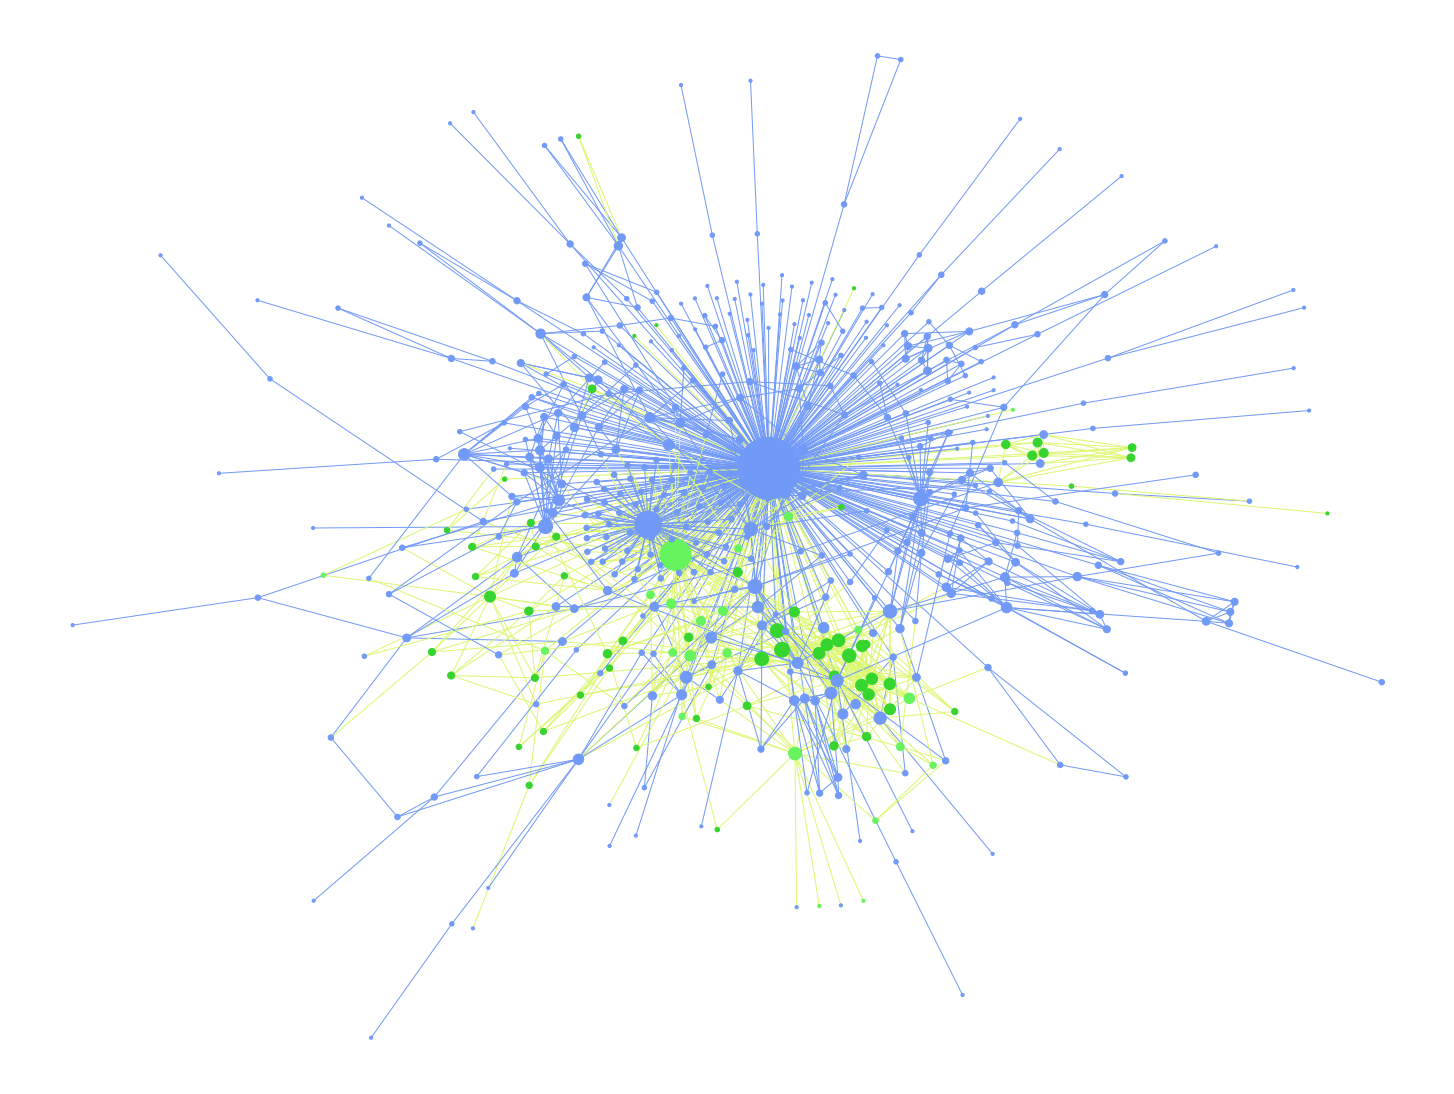

In [51]:
# conda install -c conda-forge fa2
# spatialize a weighted undirected graph in 2D (Edge weight defines the strength of the connection).
from fa2 import ForceAtlas2

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(UND_LCG, pos=None, iterations=2000)
plt.figure(figsize=(20, 15))
nx.draw(UND_LCG, node_color=node_color_map, edge_color=edge_color_map, node_size=node_size_list)
plt.show()

* Describe the structure you observe. Can you identify nodes with a privileged position in the network? Do you observe chains of connected nodes? Do you see any interesting group of nodes (can you guess who's involved)?

## Exercise 4: We continue with a qualitative inspection of the Zelda Wiki pages, that will help us to intepret our results. We investigate the reasons for links between characters to exist on Zelda Wiki.

In [52]:
# sorted(D_LCG.in_degree(),key=lambda x: x[1], reverse=True)[:3]

# Part B: Advanced tools
## Exercise 1: Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the directed graph.

In [53]:
import statistics

total_degree=dict(D_LCG.degree()).values()

in_degree=dict(D_LCG.in_degree()).values()
mean_inde=statistics.mean(in_degree)
median_inde=statistics.median(in_degree)
mode_inde=statistics.mode(in_degree)
max_inde=max(in_degree)
min_inde=min(in_degree)


out_degree=dict(D_LCG.out_degree()).values()
mean_outde=statistics.mean(out_degree)
median_outde=statistics.median(out_degree)
mode_outde=statistics.mode(out_degree)
max_outde=max(out_degree)
min_outde=min(out_degree)

print('average value of the in-degree:',mean_inde,
      '\nmax value of the in-degree:',max_inde,
      '\nmin value of the in-degree:',min_inde,
     '\nmedian value of the in-degree:',median_inde,
     '\nmode value of the in-degree:',mode_inde)

print('average value of the out-degree:',mean_outde,
      '\nmax value of the out-degree:',max_outde,
      '\nmin value of the out-degree:',min_outde,
     '\nmedian value of the out-degree:',median_outde,
     '\nmode value of the out-degree:',mode_outde)

average value of the in-degree: 2.946360153256705 
max value of the in-degree: 382 
min value of the in-degree: 0 
median value of the in-degree: 1.0 
mode value of the in-degree: 0
average value of the out-degree: 2.946360153256705 
max value of the out-degree: 13 
min value of the out-degree: 0 
median value of the out-degree: 3.0 
mode value of the out-degree: 3


In [54]:
import powerlaw

# exponent of the degree distribution
total_exp=powerlaw.Fit(list(dict(D_LCG.degree()).values())).alpha
in_exp=powerlaw.Fit(list(dict(D_LCG.in_degree()).values())).alpha
out_exp=powerlaw.Fit(list(dict(D_LCG.out_degree()).values())).alpha
print('the degree exponent for in- degree distribution',in_exp,
      ' \nthe degree exponent for out- degree distribution',out_exp,
      ' \nthe degree exponent for total- degree distribution',total_exp)

the degree exponent for in- degree distribution 2.8380206841990736  
the degree exponent for out- degree distribution 5.691618721514103  
the degree exponent for total- degree distribution 3.4748614503218334


Calculating best minimal value for power law fit
/opt/anaconda3/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


In [55]:
# The degree distribution is shown on double logarithmic axis (log-log plot), in which a power law follows a straight line. 

Text(0, 0.5, 'Frequency')

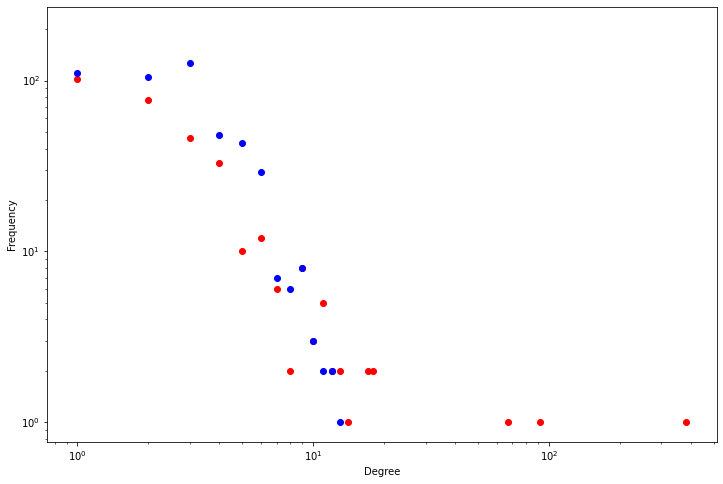

In [56]:
in_degree_freq = degree_histogram_directed(D_LCG, in_degree=True)
out_degree_freq = degree_histogram_directed(D_LCG, out_degree=True)

plt.figure(figsize=(12, 8)) 

plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'ro', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

**Conculsion: There exists hubs when counts in-degree distribution.**

<Figure size 432x288 with 0 Axes>

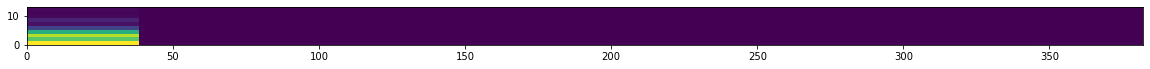

In [57]:
heatmap, xedges, yedges = np.histogram2d(list(dict(D_LCG.in_degree()).values()), list(dict(D_LCG.out_degree()).values()))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(20,5))
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

In [58]:
# Find the 5 most central characters according to degree centrality. 
dict(sorted(nx.degree_centrality(D_LCG).items(), key=lambda item: item[1], reverse=True)[:5])

{'Link': 0.7351247600767754,
 'Calamity Ganon': 0.18618042226487524,
 'Hylia': 0.1362763915547025,
 'Stalizalfos': 0.044145873320537425,
 'Princess Zelda': 0.044145873320537425}

In [59]:
# Find the 5 most central characters according to betweenness centrality.
dict(sorted(nx.betweenness_centrality(D_LCG).items(), key=lambda item: item[1], reverse=True)[:5])

{'Calamity Ganon': 0.08736799491941556,
 'Princess Zelda': 0.06778017658343723,
 'Link': 0.0666726369914689,
 'Impa': 0.05599467744292364,
 'Dark Beast Ganon': 0.05313700570518824}